# face-mask-detection

Use the "Run" button to execute the code.

Acess on Kaggle - https://www.kaggle.com/matheushenrique065/facemaskdetection

In [1]:
import sklearn 
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, InputLayer, MaxPool2D, UpSampling2D, GlobalAveragePooling2D
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg19 import VGG19
#from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.utils import plot_model

Add the "Face Mask Detection" dataset before running...

## Datasets and Data Augmentation

In [2]:
PATH = '../input/face-mask-12k-images-dataset/Face Mask Dataset/'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_Gen = ImageDataGenerator(rescale=1./255)
test_Gen = ImageDataGenerator(rescale=1./255)
valid_Gen = ImageDataGenerator(rescale=1./255)


train_Data = train_Gen.flow_from_directory(PATH+'Train', target_size=(128,128))
test_Data = test_Gen.flow_from_directory(PATH+'Test', target_size=(128,128))
valid_Data = valid_Gen.flow_from_directory(PATH+'Validation', target_size=(128,128))


Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


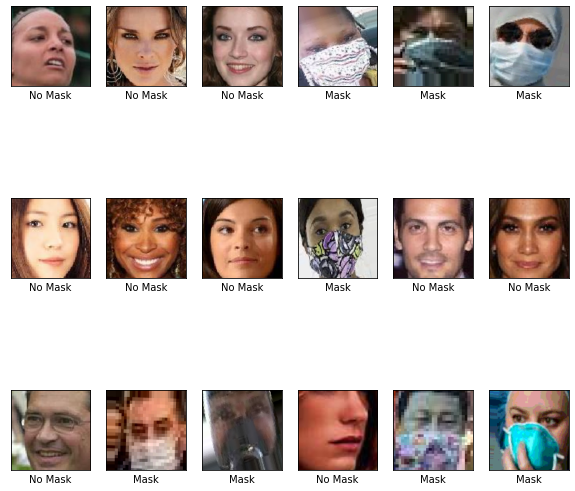

In [5]:
images, labels = next(iter(train_Data))
plt.figure(figsize=(10, 10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('No Mask' if labels[i][1] else 'Mask')

### Pre-trained model

In [6]:
ptr_model = VGG19(include_top = False, input_shape = (128,128,3))
ptr_model.trainable = False

80142336/80134624 [==============================] - 1s 0us/step


### Custom model

In [7]:
model = Sequential([
    ptr_model,
    Flatten(),
    Dense(128),
    Dropout(0.3),
    Dense(64),
    Dense(2,'sigmoid')
])

In [8]:
#Check the structure of your hidden layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 21,081,474
Trainable params: 1,057,090
Non-trainable params: 20,024,384
____________________________________

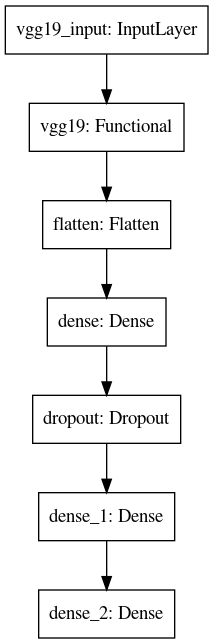

In [9]:
plot_model(model)

In [10]:
LSS =  tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer='adam', loss=LSS, metrics=['acc'])

In [11]:
history = model.fit(train_Data, batch_size = 32, epochs = 15, validation_data = valid_Data)

Epoch 1/15
313/313 [==============================] - 95s 293ms/step - loss: 0.4709 - acc: 0.9042 - val_loss: 0.0201 - val_acc: 0.9962
Epoch 2/15
313/313 [==============================] - 25s 81ms/step - loss: 0.0366 - acc: 0.9877 - val_loss: 0.0182 - val_acc: 0.9925
Epoch 3/15
313/313 [==============================] - 26s 82ms/step - loss: 0.0166 - acc: 0.9942 - val_loss: 0.0178 - val_acc: 0.9950
Epoch 4/15
313/313 [==============================] - 25s 80ms/step - loss: 0.0231 - acc: 0.9939 - val_loss: 0.0185 - val_acc: 0.9925
Epoch 5/15
313/313 [==============================] - 25s 80ms/step - loss: 0.0136 - acc: 0.9953 - val_loss: 0.0275 - val_acc: 0.9875
Epoch 6/15
313/313 [==============================] - 25s 80ms/step - loss: 0.0227 - acc: 0.9935 - val_loss: 3.9650e-04 - val_acc: 1.0000
Epoch 7/15
313/313 [==============================] - 25s 80ms/step - loss: 0.0101 - acc: 0.9965 - val_loss: 0.0038 - val_acc: 0.9987
Epoch 8/15
313/313 [==============================] - 25s

### Training history

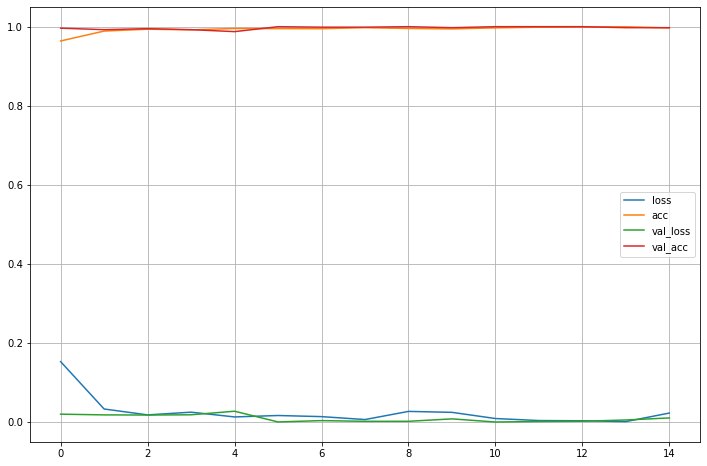

In [12]:
frame = pd.DataFrame(history.history)

frame.plot(figsize=(12,8))
plt.grid(True)
plt.show()

### Accuracy history

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

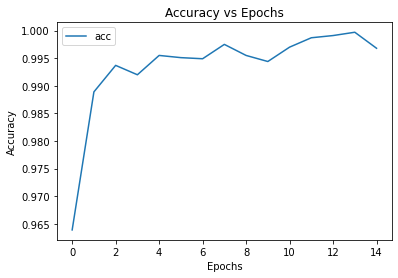

In [14]:
acc_plot = frame.plot(y='acc', title='Accuracy vs Epochs')
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')

### Loss history

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

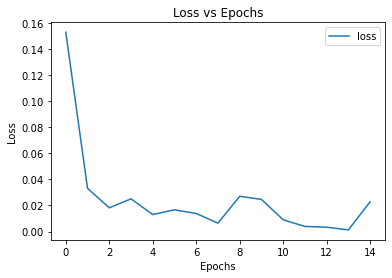

In [15]:
loss_plot = frame.plot(y='loss', title='Loss vs Epochs')
loss_plot.set(xlabel='Epochs', ylabel='Loss')

## Evaluation

In [16]:
test_loss, test_acc = model.evaluate(test_Data, verbose=3)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

Test loss: 0.05099836364388466
Test accuracy: 0.9909273982048035
